<a href="https://colab.research.google.com/github/iMuhammadAbdullahAwan/Computer_Vision/blob/main/hybrid_image_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [40]:
uploaded = files.upload()

image_names = list(uploaded.keys())
img1_path = image_names[0]
img2_path = image_names[1]

print("Image 1:", img1_path)
print("Image 2:", img2_path)


Saving abdullah.png to abdullah.png
Saving lion.png to lion (4).png
Image 1: abdullah.png
Image 2: lion (4).png


(np.float64(-0.5), np.float64(410.5), np.float64(530.5), np.float64(-0.5))

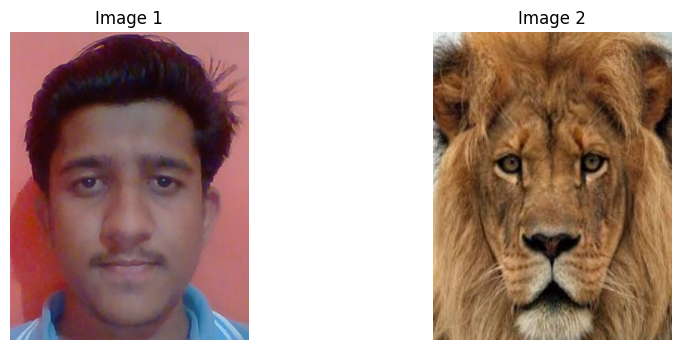

In [41]:
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize second image to match first
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Image 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title("Image 2")
plt.axis("off")


In [42]:
def low_pass(img, kernel_size=31):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def high_pass(img, kernel_size=31):
    low = low_pass(img, kernel_size)
    return img - low


(np.float64(-0.5), np.float64(410.5), np.float64(530.5), np.float64(-0.5))

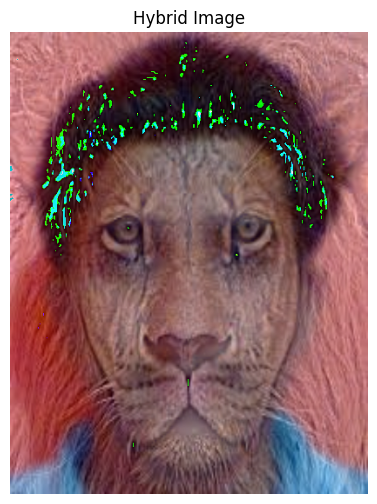

In [43]:
low_freq_img = low_pass(img1, 31)
high_freq_img = high_pass(img2, 31)

hybrid_img = np.clip(low_freq_img + high_freq_img, 0, 255).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(hybrid_img)
plt.title("Hybrid Image")
plt.axis("off")


(np.float64(-0.5), np.float64(410.5), np.float64(530.5), np.float64(-0.5))

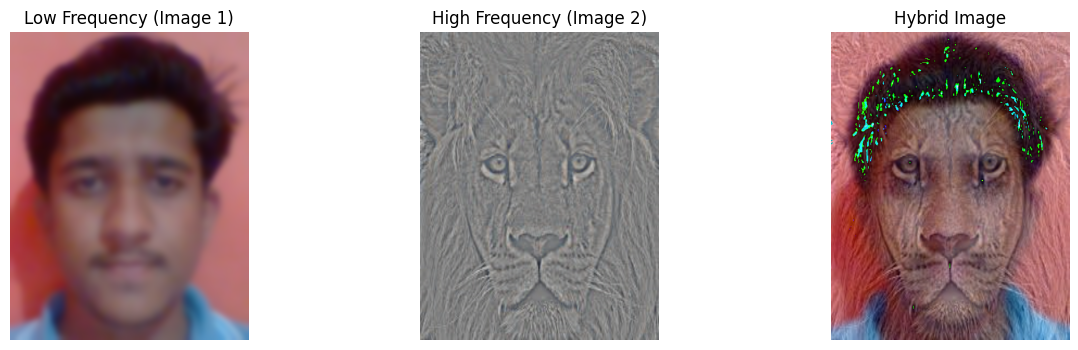

In [44]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.imshow(low_freq_img)
plt.title("Low Frequency (Image 1)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(high_freq_img + 128)
plt.title("High Frequency (Image 2)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(hybrid_img)
plt.title("Hybrid Image")
plt.axis("off")


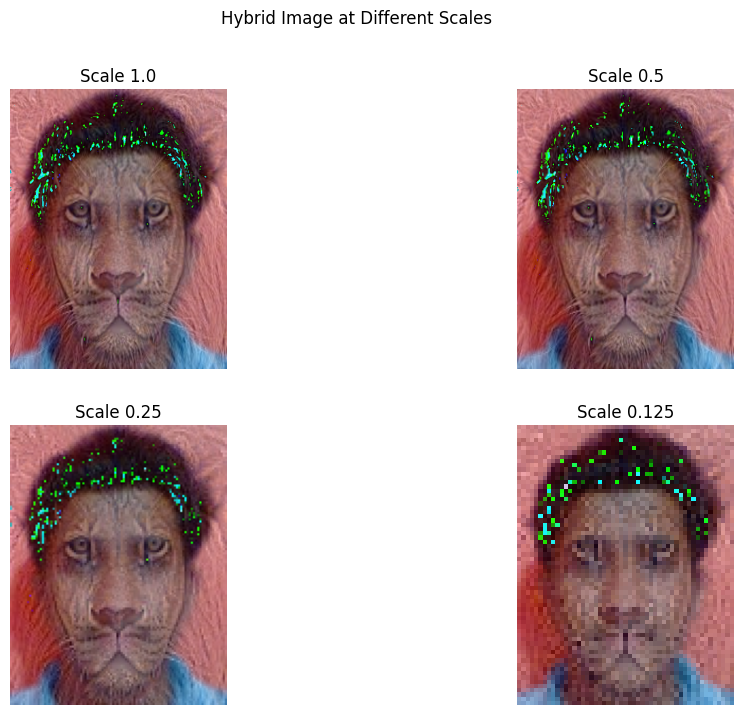

In [45]:
scales = [1.0, 0.5, 0.25, 0.125]

plt.figure(figsize=(12,8))

for i, scale in enumerate(scales):
    resized = cv2.resize(
        hybrid_img,
        (int(hybrid_img.shape[1]*scale), int(hybrid_img.shape[0]*scale))
    )
    plt.subplot(2,2,i+1)
    plt.imshow(resized)
    plt.title(f"Scale {scale}")
    plt.axis("off")

plt.suptitle("Hybrid Image at Different Scales")
plt.show()


In [46]:
cv2.imwrite("hybrid_image.png", cv2.cvtColor(hybrid_img, cv2.COLOR_RGB2BGR))

print("Hybrid image saved as hybrid_image.png")


Hybrid image saved as hybrid_image.png
